# Finance Project

- **Data Description:** The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

- **Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ps
from scipy.stats import zscore

In [108]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", 1)
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [109]:
#checking the number of rows and columns in the data
df.shape

(5000, 14)

In [110]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [111]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [112]:
#removing unnecessary columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [113]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [114]:
#5 number summary
fig = ps.box(df, y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

In [115]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [116]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

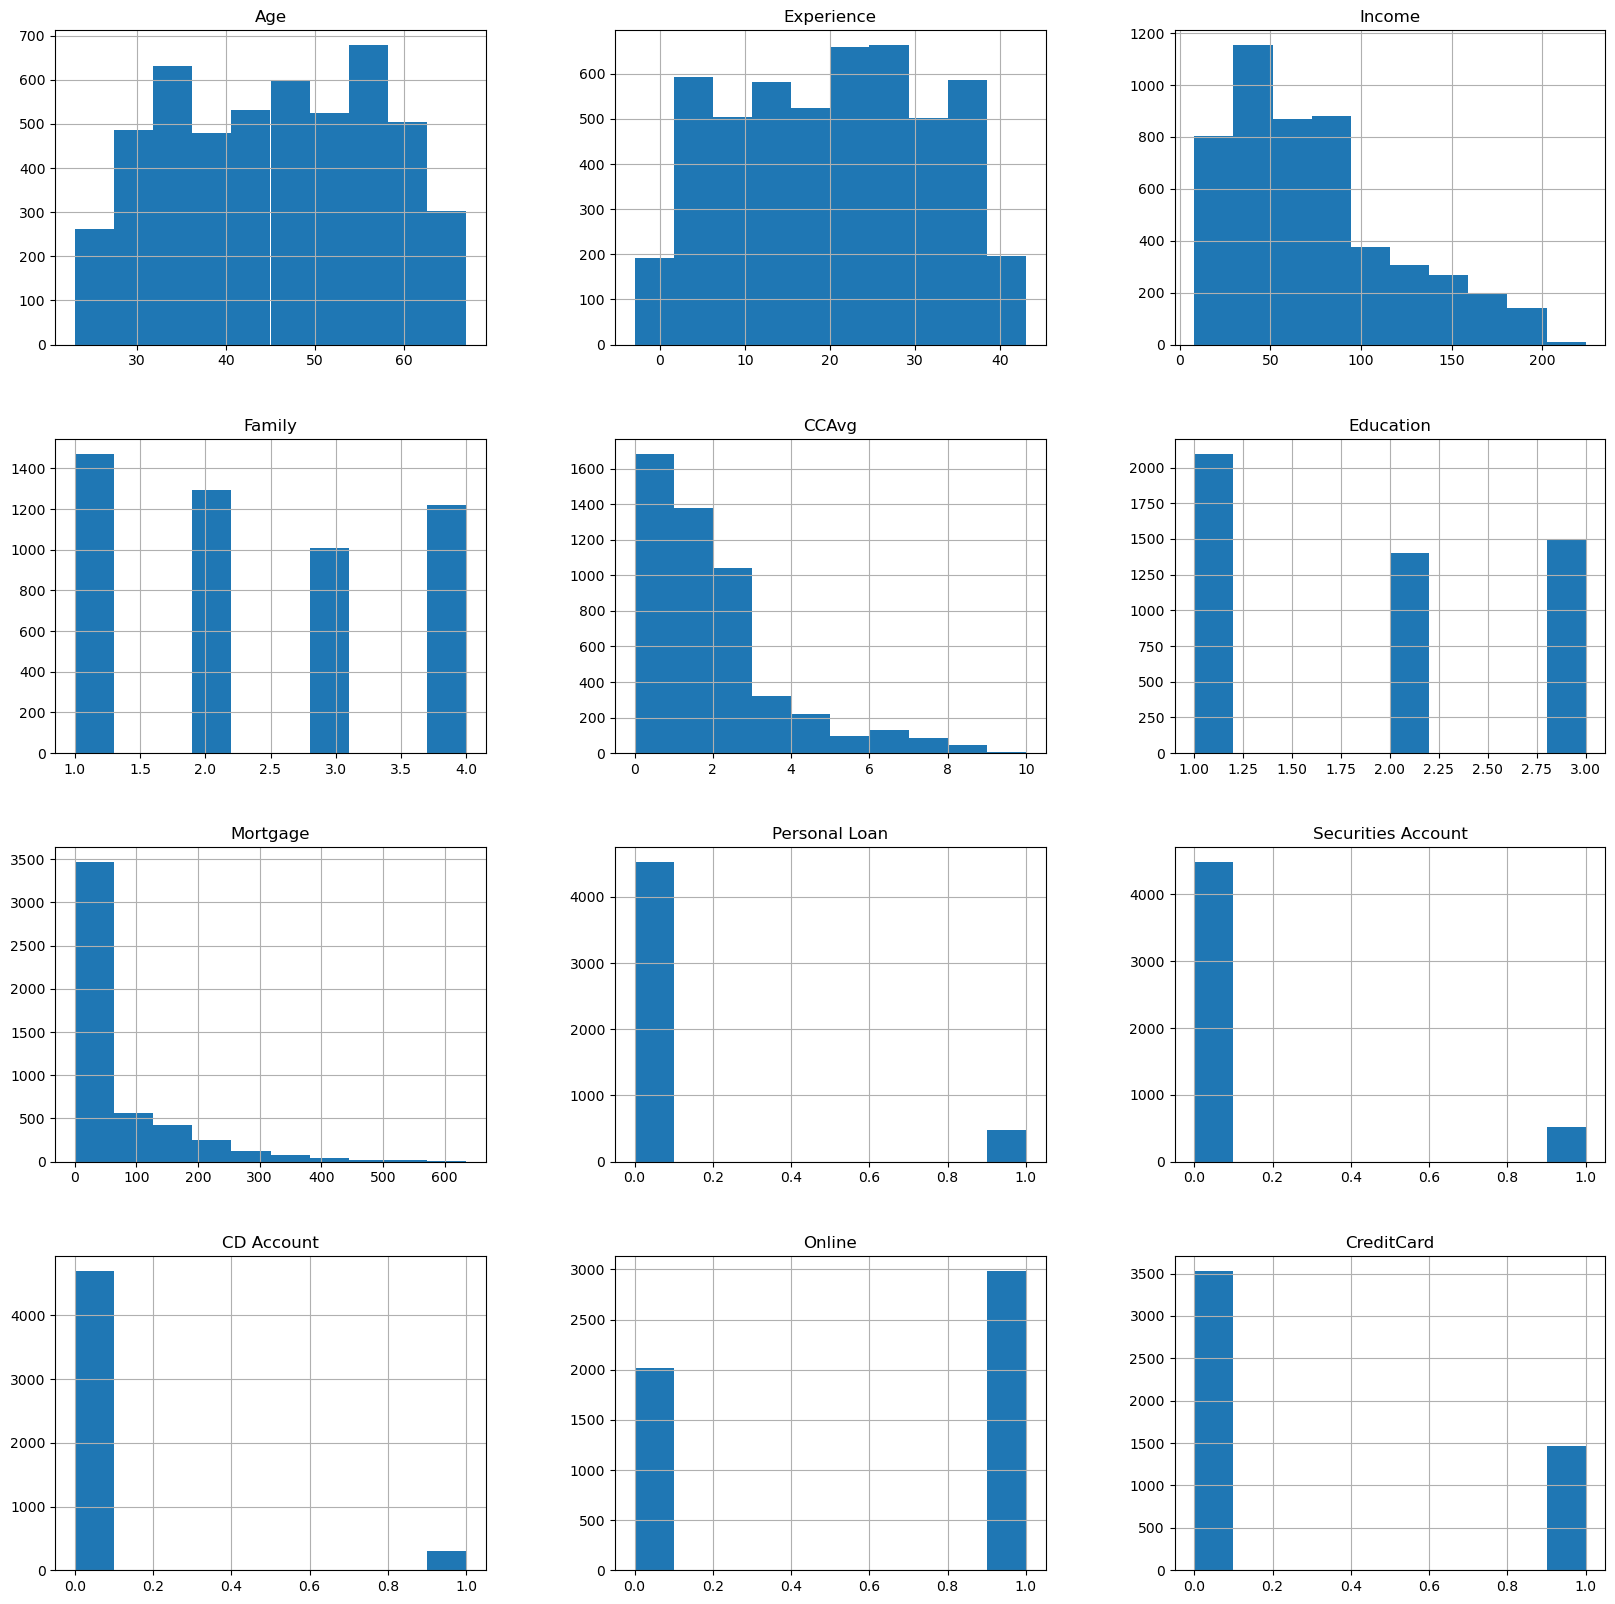

In [117]:
df.hist(figsize=(20,20))

C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\4088753809.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

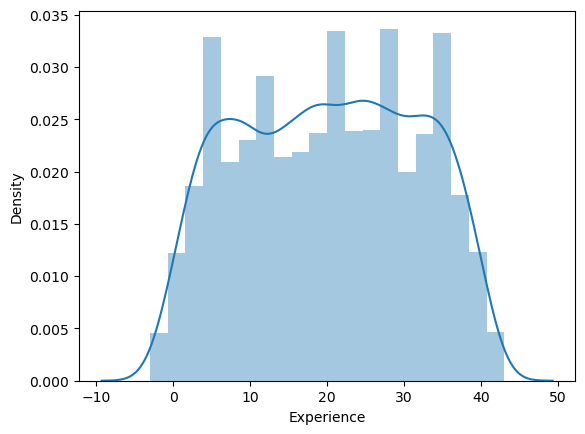

In [118]:
sns.distplot(df['Experience'])

In [119]:
df['Experience'].mean()

20.1046

In [120]:
negative_exp = df[df['Experience']<0]
negative_exp.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [121]:
negative_exp.shape

(52, 12)

C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\3268055496.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

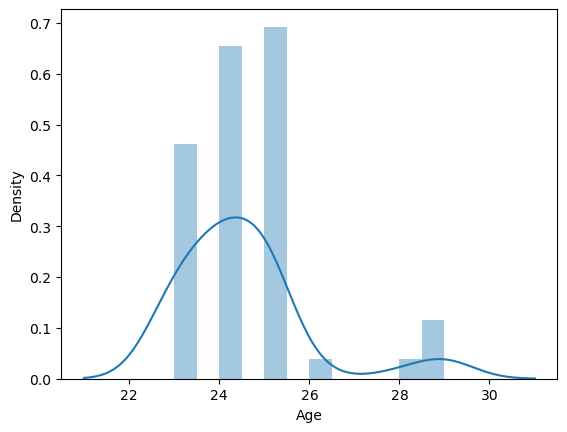

In [122]:
sns.distplot(negative_exp['Age'])

In [123]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [124]:
negative_exp.size

624

In [125]:
print('There are {} records which has negative values for experience, approx {} %'.format(negative_exp.size , 
                                ((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [126]:
data = df.copy()

In [127]:
data.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [128]:
data.shape

(5000, 12)

In [129]:
df.shape

(5000, 12)

In [130]:
#replacing negative values by mean
data['Experience'] = np.where(data['Experience']<0,
                              data['Experience'].mean(),
                              data['Experience'])

In [131]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [132]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

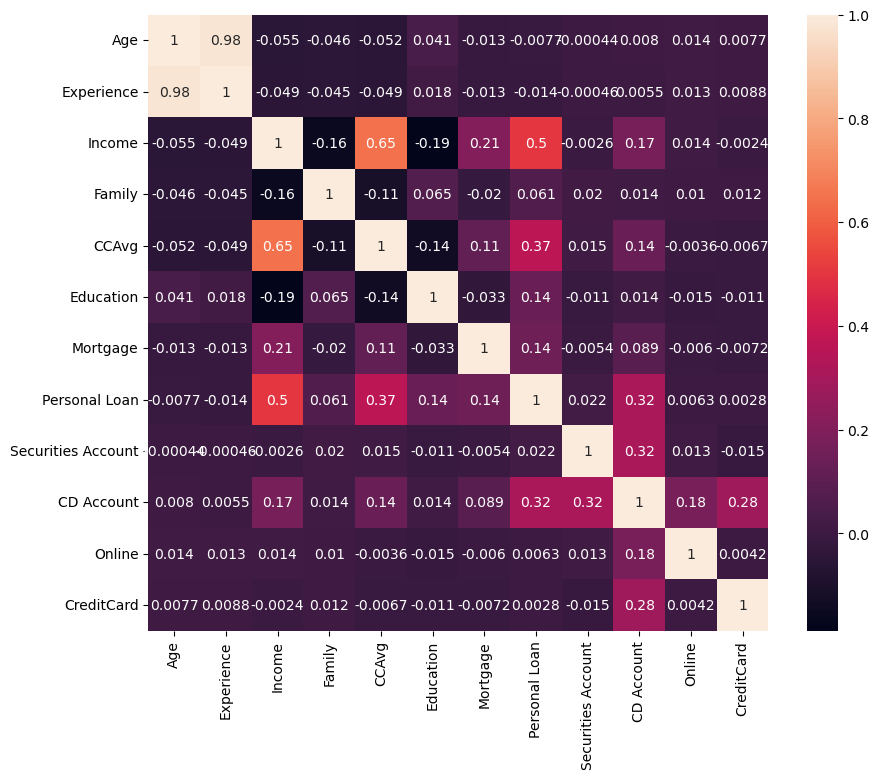

In [133]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot=True)

In [134]:
data = data.drop(['Experience'], axis = 1)

In [135]:
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [136]:
# Education
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [137]:
#convert into categorical data
def experience(x):
    if x == 1:
        return "Undergraduate"
    if x == 2:
        return "Graduate"
    if x == 3:
        return "Working Professional"

In [138]:
data['EDU'] = data['Education'].apply(experience)

In [139]:
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate
5,37,29,4,0.4,2,155,0,0,0,1,0,Graduate
6,53,72,2,1.5,2,0,0,0,0,1,0,Graduate
7,50,22,1,0.3,3,0,0,0,0,0,1,Working Professional
8,35,81,3,0.6,2,104,0,0,0,1,0,Graduate
9,34,180,1,8.9,3,0,1,0,0,0,0,Working Professional


In [140]:
data['EDU'].unique()

array(['Undergraduate', 'Graduate', 'Working Professional'], dtype=object)

In [141]:
education_dis = data.groupby('EDU')['Age'].count()

In [142]:
education_dis

EDU
Graduate                1403
Undergraduate           2096
Working Professional    1501
Name: Age, dtype: int64

In [143]:
fig = ps.pie(data, values=education_dis, names=education_dis.index, title='Pie Chart')
fig.show()

In [144]:
#Income
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [145]:
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [146]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [147]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Security & Deposit Acc"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Neither Security nor Deposit Acc"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Only Security Acc"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Only Deposit Acc"

In [148]:
data['Account_holder_category'] = data.apply(security, axis = 1)

In [149]:
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate,Only Security Acc
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate,Only Security Acc
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate,Neither Security nor Deposit Acc
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Neither Security nor Deposit Acc
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Neither Security nor Deposit Acc
5,37,29,4,0.4,2,155,0,0,0,1,0,Graduate,Neither Security nor Deposit Acc
6,53,72,2,1.5,2,0,0,0,0,1,0,Graduate,Neither Security nor Deposit Acc
7,50,22,1,0.3,3,0,0,0,0,0,1,Working Professional,Neither Security nor Deposit Acc
8,35,81,3,0.6,2,104,0,0,0,1,0,Graduate,Neither Security nor Deposit Acc
9,34,180,1,8.9,3,0,1,0,0,0,0,Working Professional,Neither Security nor Deposit Acc


In [150]:
data['Account_holder_category'].value_counts()

Account_holder_category
Neither Security nor Deposit Acc    4323
Only Security Acc                    375
Only Deposit Acc                     155
Security & Deposit Acc               147
Name: count, dtype: int64

In [151]:
#Now we analyze relationship between columns
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\2771839992.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\2771839992.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




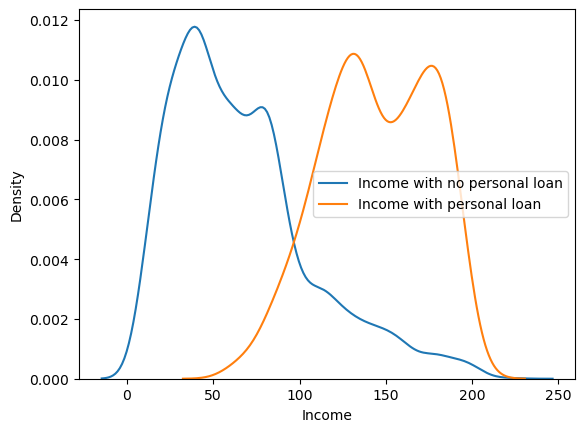

In [152]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False, 
            label = "Income with no personal loan")

sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,
            label = "Income with personal loan")
plt.legend()

In [153]:
def plot(col1, col2, label1, label2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False, 
            label =label1)
    
    sns.distplot(data[data[col2] == 1][col1], hist = False, 
            label = label2)
    
    plt.legend()
    plt.title(title)

C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\1811863778.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\1811863778.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




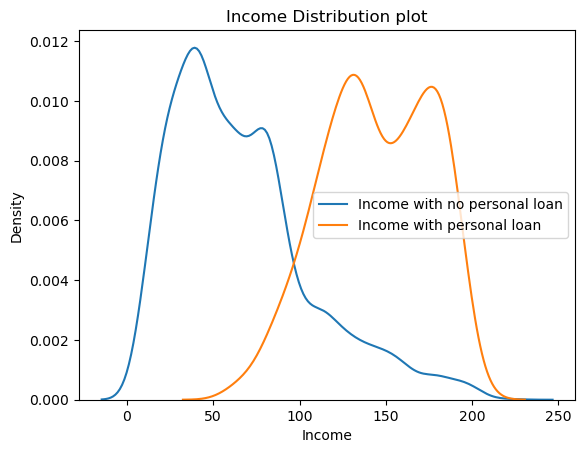

In [154]:
plot('Income', 'Personal Loan', "Income with no personal loan", "Income with personal loan", "Income Distribution plot")

C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\1811863778.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ashuj\AppData\Local\Temp\ipykernel_10028\1811863778.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




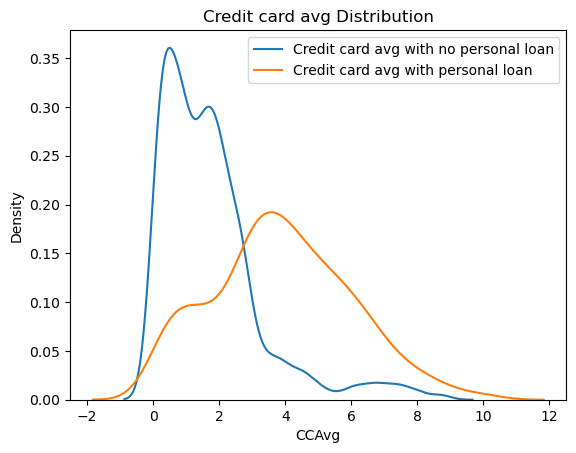

In [155]:
plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [156]:
#remaining columns to be analyzed
col = ['Securities Account',
      'Online', 
      'Account_holder_category',
      'CreditCard']

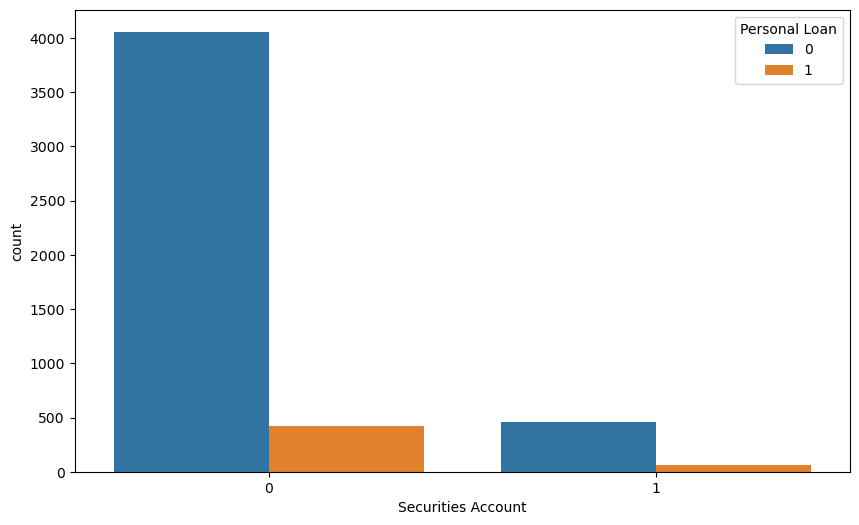

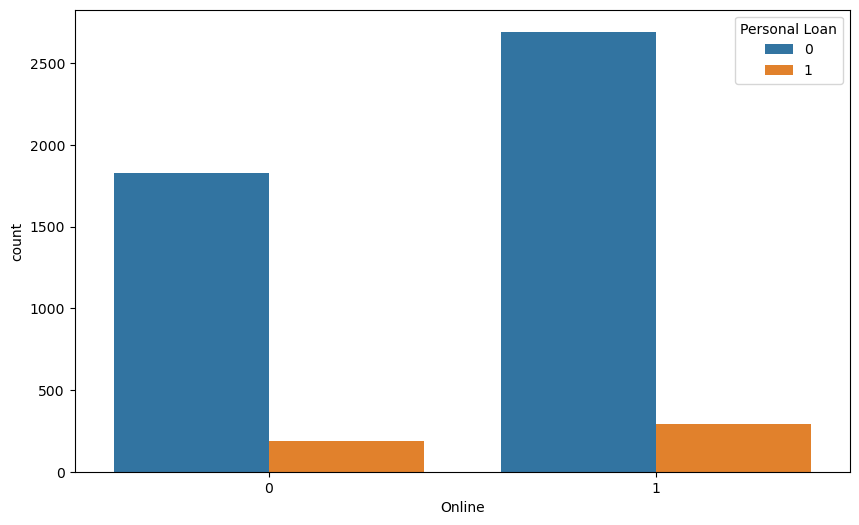

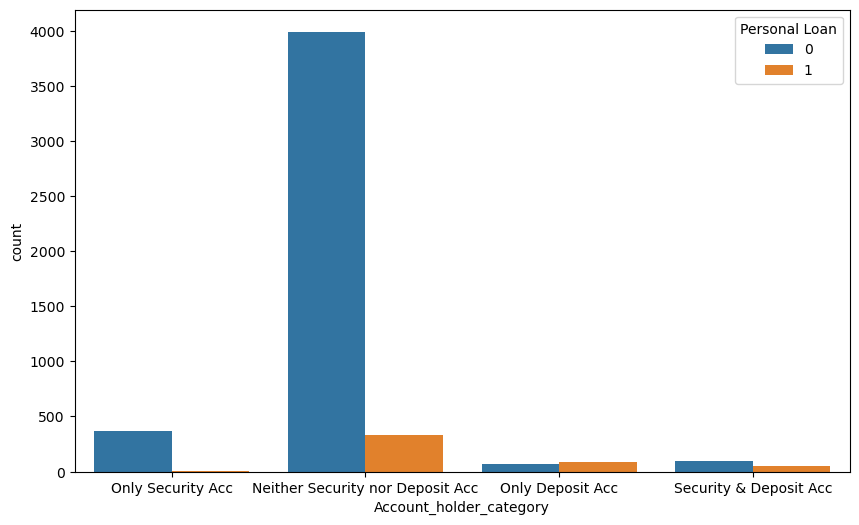

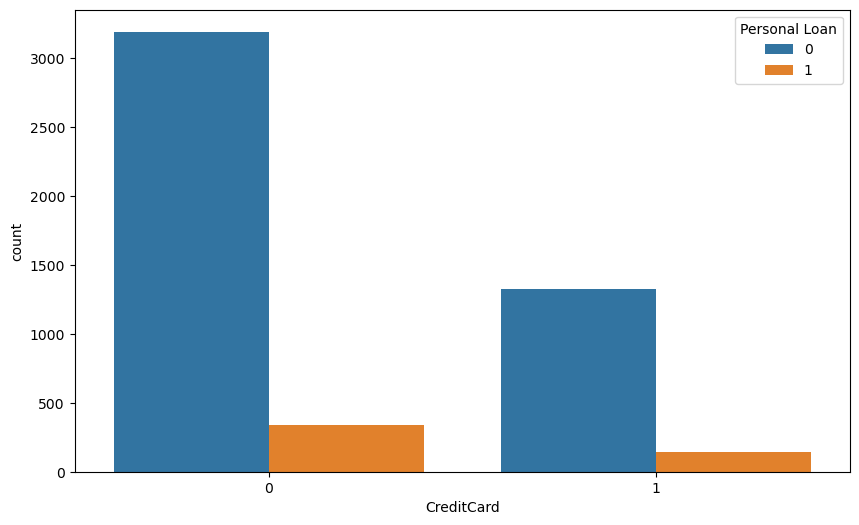

In [157]:
for i in col:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')